In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

from collections import Counter

## Import data

In [2]:
# display options:
pd.set_option('display.max_columns', None)

# import the data into a Pandas dataframe
df = pd.read_csv("hotel_bookings_ML_data.csv", index_col=0)
df.head(10)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119205 entries, 0 to 119389
Data columns (total 50 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119205 non-null  float64
 1   lead_time                       119205 non-null  float64
 2   arrival_date_week_number        119205 non-null  float64
 3   arrival_date_day_of_month       119205 non-null  float64
 4   stays_in_weekend_nights         119205 non-null  float64
 5   stays_in_week_nights            119205 non-null  float64
 6   adults                          119205 non-null  float64
 7   children                        119205 non-null  float64
 8   babies                          119205 non-null  float64
 9   is_repeated_guest               119205 non-null  float64
 10  previous_cancellations          119205 non-null  float64
 11  previous_bookings_not_canceled  119205 non-null  float64
 12  agent           

## Data split

In [3]:
X,y = df.drop(['is_canceled'],axis=1), df['is_canceled']
X.head()

lead_time  arrival_date_week_number  arrival_date_day_of_month  \
0   0.464043                       0.5                        0.0   
1   1.000000                       0.5                        0.0   
2   0.009498                       0.5                        0.0   
3   0.017639                       0.5                        0.0   
4   0.018996                       0.5                        0.0   

   stays_in_weekend_nights  stays_in_week_nights    adults  children  babies  \
0                      0.0                  0.00  0.036364       0.0     0.0   
1                      0.0                  0.00  0.036364       0.0     0.0   
2                      0.0                  0.02  0.018182       0.0     0.0   
3                      0.0                  0.02  0.018182       0.0     0.0   
4                      0.0                  0.04  0.036364       0.0     0.0   

   is_repeated_guest  previous_cancellations  previous_bookings_not_canceled  \
0                0.0                     0.0                             0.0   
1                0.0                     0.0                             0.0   
2                0.0                     0.0                             0.0   
3                0.0                     0.0                             0.0   
4                0.0                     0.0                             0.0   

   agent  company  days_in_waiting_list       adr  \
0    0.0      0.0                   0.0  0.001180   
1    0.0      0.0                   0.0  0.001180   
2    0.0      0.0                   0.0  0.015053   
3    1.0      0.0                   0.0  0.015053   
4    1.0      0.0                   0.0  0.019307   

   required_car_parking_spaces  total_of_special_requests  hotel  \
0                          0.0                        0.0    0.0   
1                          0.0                        0.0    0.0   
2                          0.0                        0.0    0.0   
3                          0.0                        0.0    0.0   
4                          0.0                        0.2    0.0   

   arrival_date_month      meal  res_status_month  res_status_day  \
0            0.545455  0.666667          0.545455        0.000000   
1            0.545455  0.666667          0.545455        0.000000   
2            0.545455  0.666667          0.545455        0.033333   
3            0.545455  0.666667          0.545455        0.033333   
4            0.545455  0.666667          0.545455        0.066667   

   mar_seg_Aviation  mar_seg_Complementary  mar_seg_Corporate  mar_seg_Direct  \
0               0.0                    0.0                0.0             1.0   
1               0.0                    0.0                0.0             1.0   
2               0.0                    0.0                0.0             1.0   
3               0.0                    0.0                1.0             0.0   
4               0.0                    0.0                0.0             0.0   

   mar_seg_Groups  mar_seg_Offline TA/TO  mar_seg_Online TA  \
0             0.0                    0.0                0.0   
1             0.0                    0.0                0.0   
2             0.0                    0.0                0.0   
3             0.0                    0.0                0.0   
4             0.0                    0.0                1.0   

   dist_ch_Corporate  dist_ch_Direct  dist_ch_GDS  dist_ch_TA/TO  res_room_A  \
0                0.0             1.0          0.0            0.0         0.0   
1                0.0             1.0          0.0            0.0         0.0   
2                0.0             1.0          0.0            0.0         1.0   
3                1.0             0.0          0.0            0.0         1.0   
4                0.0             0.0          0.0            1.0         1.0   

   res_room_B  res_room_C  res_room_D  res_room_E  res_room_F  res_room_G  \
0         0.0         1.0         0.0         0.0         0

In [4]:
# dividing the dataset into training (X_train, y_train), validation (X_val, y_val) and testing (X_test,y_test) data

Xt, X_test, yt, y_test = train_test_split(X,y,test_size=0.1,train_size=0.9, random_state = 1234)
X_train, X_val, y_train, y_val = train_test_split(Xt,yt,test_size = 0.11,train_size =0.89, random_state = 5678)

print('Size of X_train: {} ({:2.2f}%)'.format(X_train.shape[0], 100*round(X_train.shape[0]/X.shape[0],3)))
print('Size of X_val: {} ({:2.2f}%)'.format(X_val.shape[0], 100*round(X_val.shape[0]/X.shape[0],3)))
print('Size of X_test: {} ({:2.2f}%)'.format(X_test.shape[0], 100*round(X_test.shape[0]/X.shape[0],3)))

Size of X_train: 95482 (80.10%)
Size of X_val: 11802 (9.90%)
Size of X_test: 11921 (10.00%)


In [5]:
def evaluate(model, X, y):
    y_pred = model.predict(X)
    acc = 100*accuracy_score(y, y_pred) 
    print('Accuracy = {:0.5f}%.'.format(acc))
    return acc

## ML method SVM

#Create classifier
model_svm = SVC(probability=True)

#Train the model
model_svm.fit(X_train, y_train)

#For confusion matrices
y_pred_svm = model_svm.predict(X_val)
y_pred_prob_svm = model_svm.predict_proba(X_val)

#Accuracy
val_accuracy = evaluate(model_svm, X_val, y_val) 

## ML method SGD

In [6]:
#Create classifier
model_sgd = SGDClassifier(max_iter=1000, loss='modified_huber')

#Train the model
model_sgd.fit(X_train, y_train)

#For confusion matrices
y_pred_sgd = model_sgd.predict(X_val)
y_pred_prob_sgd = model_sgd.predict_proba(X_val)

#Accuracy
val_accuracy = evaluate(model_sgd, X_val, y_val) 

Accuracy = 80.07117%.


## ML method Logistic regression

In [7]:
#Create classifier
model_log = LogisticRegression(random_state = 1234, solver='saga', max_iter = 10000)

#Train the classifier
model_log.fit(X_train, y_train)

#For confusion matrices
y_pred_log = model_log.predict(X_val)
y_pred_prob_log = model_log.predict_proba(X_val)

#Accuracy
val_accuracy = evaluate(model_log, X_val, y_val)

Accuracy = 80.80834%.


## ML method Random forest

In [8]:
#Create classifier
model_rf = RandomForestClassifier(criterion = "gini", random_state = 1234, min_samples_leaf=3, n_estimators=100)

#Train the classifier
model_rf.fit(X_train, y_train)

#For confusion matrices
y_pred_rf = model_rf.predict(X_val)
y_pred_prob_rf = model_rf.predict_proba(X_val)

#Accuracy
val_accuracy = evaluate(model_rf, X_val, y_val)

Accuracy = 94.40773%.


## ML method Decision tree

In [9]:
#Create classifier
model_dt = DecisionTreeClassifier(criterion = "gini", random_state = 1234, min_samples_leaf=3)

#Train the classifier
model_dt.fit(X_train, y_train)

#For confusion matrices
y_pred_dt = model_dt.predict(X_val)
y_pred_prob_dt = model_dt.predict_proba(X_val)

#Accuracy
val_accuracy = evaluate(model_dt, X_val, y_val)

Accuracy = 95.77190%.


## Confusion matrices

In [10]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylim([1.5, -0.5]) #added to fix a bug that causes the matrix to be squished
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

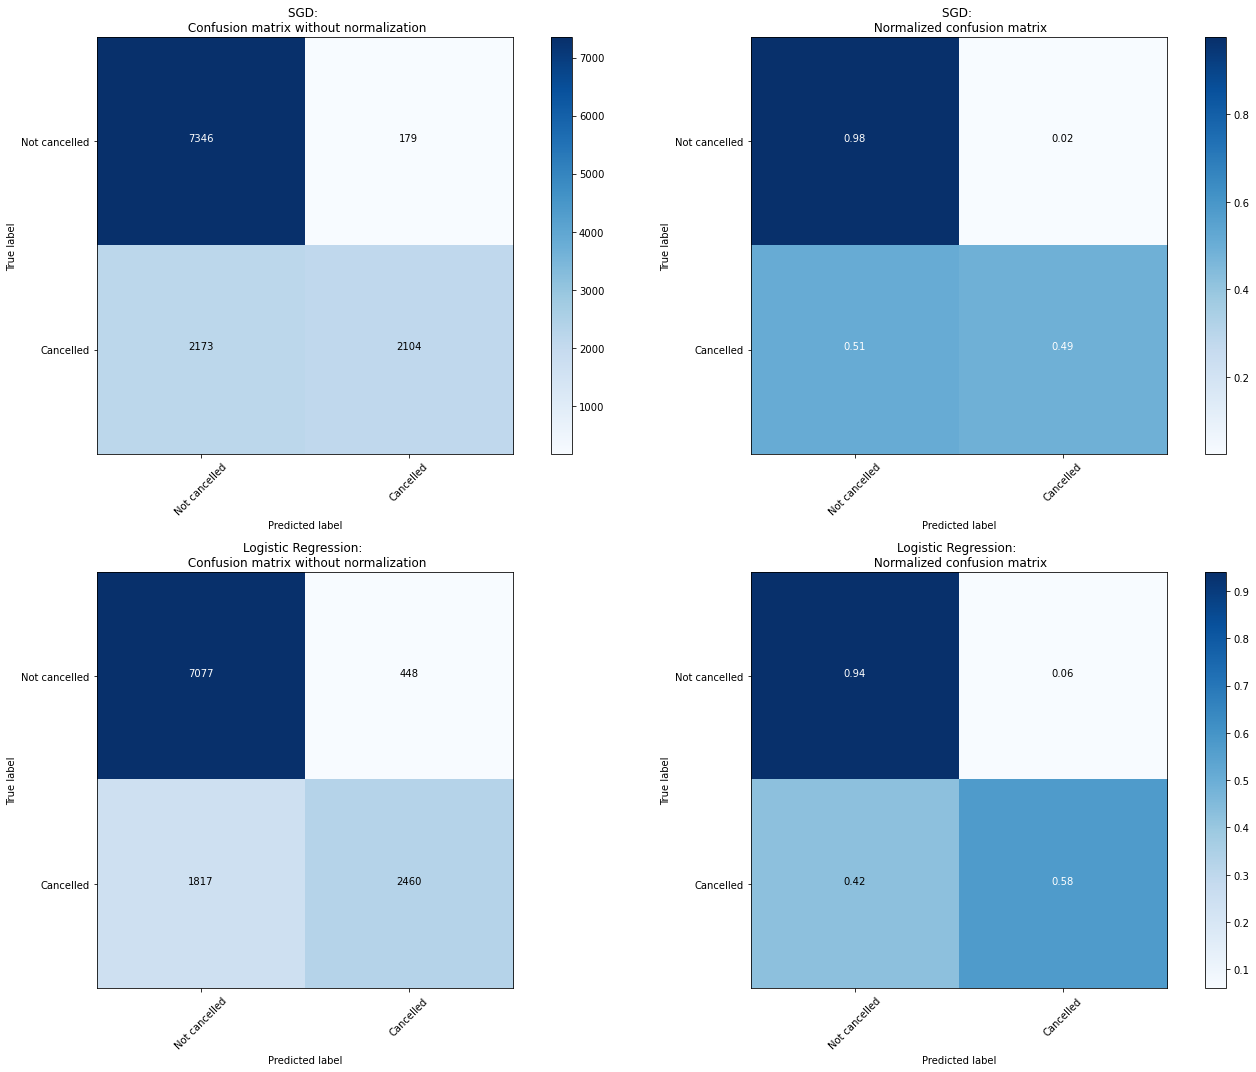

In [11]:
#Compute confusion matrix
class_names = ['Not cancelled', 'Cancelled']
cnf_matrix_sgd = confusion_matrix(y_val, y_pred_sgd)
cnf_matrix_log = confusion_matrix(y_val, y_pred_log)
cnf_matrix_rf = confusion_matrix(y_val, y_pred_rf)
cnf_matrix_dt = confusion_matrix(y_val, y_pred_dt)

np.set_printoptions(precision=2)

plt.figure(figsize=(20, 15))


#Plot SVM confusion matrix
plt.subplot(221)
plot_confusion_matrix(cnf_matrix_sgd, classes=class_names, title="SGD: \n Confusion matrix without normalization")

plt.subplot(222)
plot_confusion_matrix(cnf_matrix_sgd, classes=class_names, normalize=True, title="SGD: \n Normalized confusion matrix")

#Plot LogisticRegression confusion matrix
plt.subplot(223)
plot_confusion_matrix(cnf_matrix_log, classes=class_names, title="Logistic Regression: \n Confusion matrix without normalization")

plt.subplot(224)
plot_confusion_matrix(cnf_matrix_log, classes=class_names, normalize=True, title="Logistic Regression: \n Normalized confusion matrix")

plt.show()


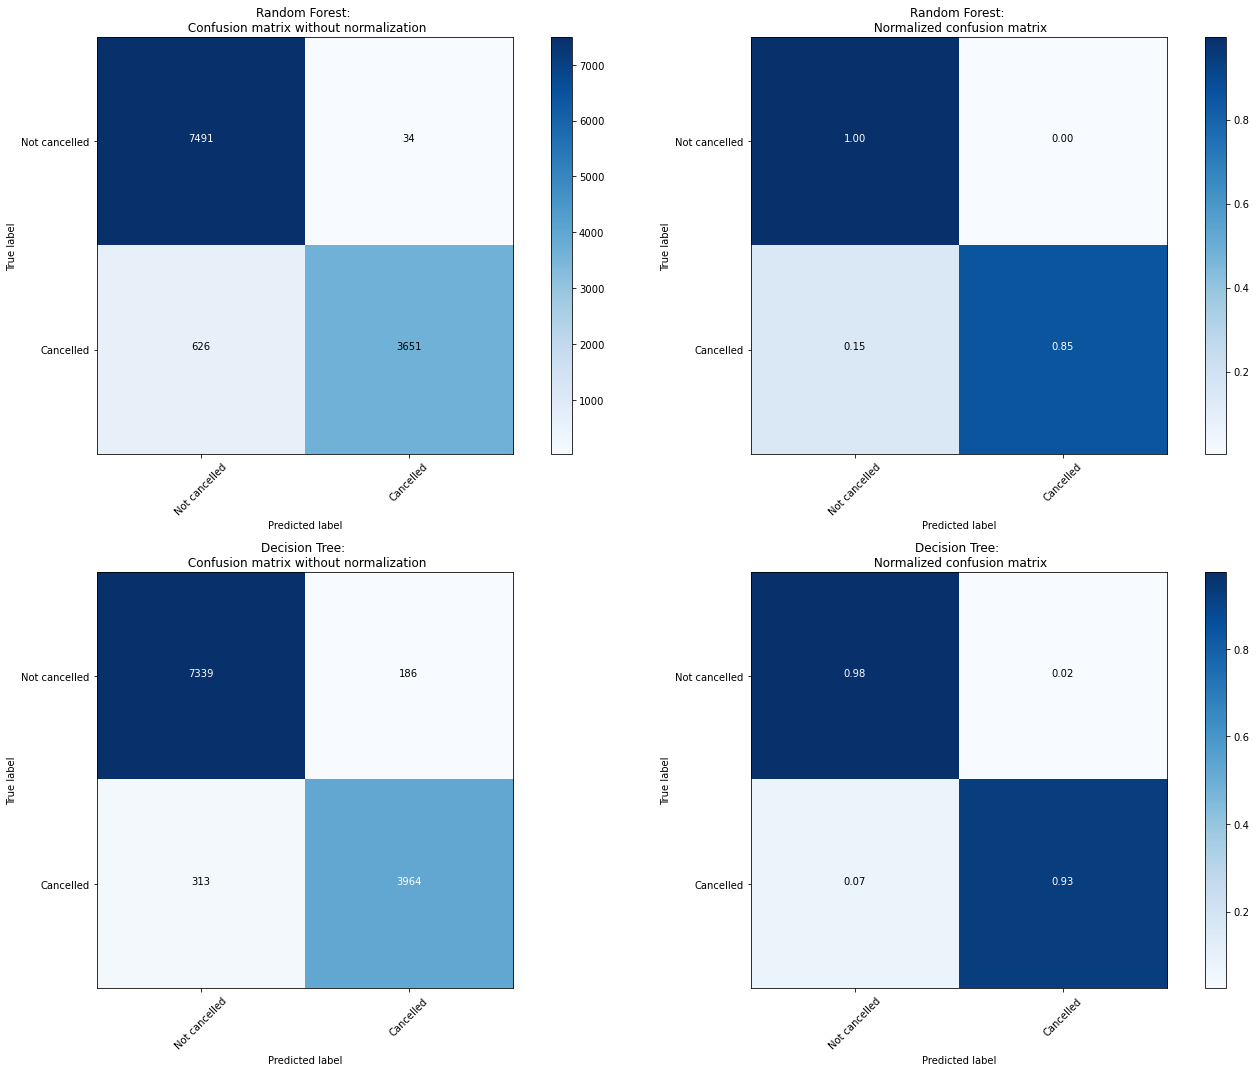

In [12]:
plt.figure(figsize=(20, 15))

#Plot RandomForest confusion matrix
plt.subplot(221)
plot_confusion_matrix(cnf_matrix_rf, classes=class_names, title="Random Forest: \n Confusion matrix without normalization")

plt.subplot(222)
plot_confusion_matrix(cnf_matrix_rf, classes=class_names, normalize=True, title="Random Forest: \n Normalized confusion matrix")

#Plot DecisionTree confusion matrix
plt.subplot(223)
plot_confusion_matrix(cnf_matrix_dt, classes=class_names, title="Decision Tree: \n Confusion matrix without normalization")

plt.subplot(224)
plot_confusion_matrix(cnf_matrix_dt, classes=class_names, normalize=True, title="Decision Tree: \n Normalized confusion matrix")



## ROC and AUC

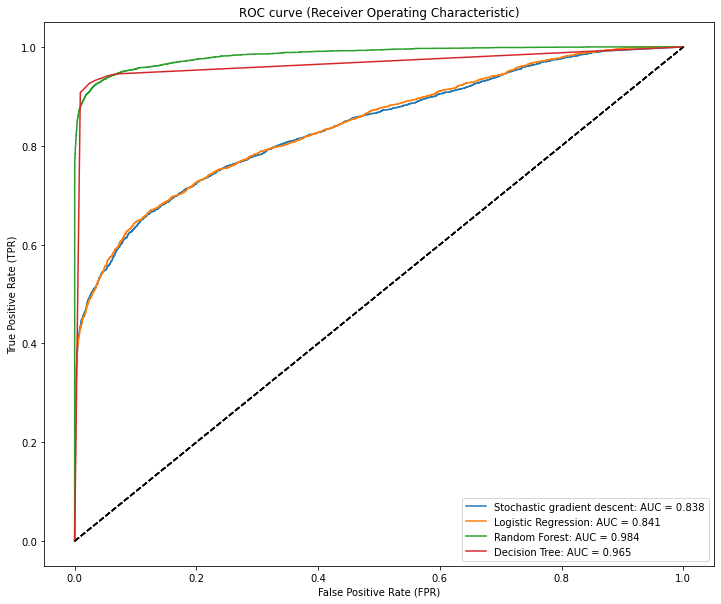

In [15]:
plt.figure(figsize=(12,10))

for test, pred, name in zip([y_val, y_val, y_val, y_val], [y_pred_prob_sgd[:,1], y_pred_prob_log[:,1], y_pred_prob_rf[:,1], y_pred_prob_dt[:,1]], ['Stochastic gradient descent','Logistic Regression','Random Forest', 'Decision Tree']):
    fpr, tpr, _ = roc_curve(test, pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='{}: AUC = {}'.format(name, round(roc_auc, 3)))
    plt.legend(loc='best')
    plt.plot([0,1],[0,1],color='black', linestyle='--')

plt.title('ROC curve (Receiver Operating Characteristic)')    
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')

plt.show()

In [14]:
X.head()

lead_time  arrival_date_week_number  arrival_date_day_of_month  \
0   0.464043                       0.5                        0.0   
1   1.000000                       0.5                        0.0   
2   0.009498                       0.5                        0.0   
3   0.017639                       0.5                        0.0   
4   0.018996                       0.5                        0.0   

   stays_in_weekend_nights  stays_in_week_nights    adults  children  babies  \
0                      0.0                  0.00  0.036364       0.0     0.0   
1                      0.0                  0.00  0.036364       0.0     0.0   
2                      0.0                  0.02  0.018182       0.0     0.0   
3                      0.0                  0.02  0.018182       0.0     0.0   
4                      0.0                  0.04  0.036364       0.0     0.0   

   is_repeated_guest  previous_cancellations  previous_bookings_not_canceled  \
0                0.0                     0.0                             0.0   
1                0.0                     0.0                             0.0   
2                0.0                     0.0                             0.0   
3                0.0                     0.0                             0.0   
4                0.0                     0.0                             0.0   

   agent  company  days_in_waiting_list       adr  \
0    0.0      0.0                   0.0  0.001180   
1    0.0      0.0                   0.0  0.001180   
2    0.0      0.0                   0.0  0.015053   
3    1.0      0.0                   0.0  0.015053   
4    1.0      0.0                   0.0  0.019307   

   required_car_parking_spaces  total_of_special_requests  hotel  \
0                          0.0                        0.0    0.0   
1                          0.0                        0.0    0.0   
2                          0.0                        0.0    0.0   
3                          0.0                        0.0    0.0   
4                          0.0                        0.2    0.0   

   arrival_date_month      meal  res_status_month  res_status_day  \
0            0.545455  0.666667          0.545455        0.000000   
1            0.545455  0.666667          0.545455        0.000000   
2            0.545455  0.666667          0.545455        0.033333   
3            0.545455  0.666667          0.545455        0.033333   
4            0.545455  0.666667          0.545455        0.066667   

   mar_seg_Aviation  mar_seg_Complementary  mar_seg_Corporate  mar_seg_Direct  \
0               0.0                    0.0                0.0             1.0   
1               0.0                    0.0                0.0             1.0   
2               0.0                    0.0                0.0             1.0   
3               0.0                    0.0                1.0             0.0   
4               0.0                    0.0                0.0             0.0   

   mar_seg_Groups  mar_seg_Offline TA/TO  mar_seg_Online TA  \
0             0.0                    0.0                0.0   
1             0.0                    0.0                0.0   
2             0.0                    0.0                0.0   
3             0.0                    0.0                0.0   
4             0.0                    0.0                1.0   

   dist_ch_Corporate  dist_ch_Direct  dist_ch_GDS  dist_ch_TA/TO  res_room_A  \
0                0.0             1.0          0.0            0.0         0.0   
1                0.0             1.0          0.0            0.0         0.0   
2                0.0             1.0          0.0            0.0         1.0   
3                1.0             0.0          0.0            0.0         1.0   
4                0.0             0.0          0.0            1.0         1.0   

   res_room_B  res_room_C  res_room_D  res_room_E  res_room_F  res_room_G  \
0         0.0         1.0         0.0         0.0         0